In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'
# 解决负号无法正常显示问题
plt.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='svg'

- 总命中率以及每场比赛的命中率并可视化
- 各节命中率及其变化
- 各赛季命中率及其变化
- 2分球和3分球命中率
- 各个位置的命中率
- 主客场命中率
- 进球方式命中率
- 各得分方式的使用概率
- 各个位置的出手概率

In [2]:
# 读取数据
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

- shot_made_flag字段存在缺失，删除
- game_event_id、lat、lon、team_id、team_name无用删除
- 增加主客场记录字段
- 统一剩余时间单位

# 预处理

In [4]:
kobe = data.drop(['game_event_id', 'lat', 'lon', 'team_id', 'team_name', 'seconds_remaining', 'minutes_remaining', 'matchup'], axis=1)

In [5]:
# 0代表客场，1代表主场
kobe['home'] = data['matchup'].apply(lambda x: 0 if x[4]=='@' else 1)
kobe['period_seconds_remaining'] = 60 * data['minutes_remaining'] + data['seconds_remaining']

In [6]:
kobe.dropna(inplace=True)

In [7]:
kobe['game_date'] = kobe.game_date.apply(lambda x: pd.to_datetime(x))

In [8]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 19 columns):
action_type                 25697 non-null object
combined_shot_type          25697 non-null object
game_id                     25697 non-null int64
loc_x                       25697 non-null int64
loc_y                       25697 non-null int64
period                      25697 non-null int64
playoffs                    25697 non-null int64
season                      25697 non-null object
shot_distance               25697 non-null int64
shot_made_flag              25697 non-null float64
shot_type                   25697 non-null object
shot_zone_area              25697 non-null object
shot_zone_basic             25697 non-null object
shot_zone_range             25697 non-null object
game_date                   25697 non-null datetime64[ns]
opponent                    25697 non-null object
shot_id                     25697 non-null int64
home                        25697 non-n

# 总命中率以及每场比赛的命中率

In [9]:
# 总命中率
kobe.shot_made_flag.mean()

0.44616103047048294

In [10]:
# 每场比赛的命中率
x = kobe.pivot_table(index='game_id', values='shot_made_flag', aggfunc='mean')

Text(0.5, 1.0, '科比每场命中率变化示意图')

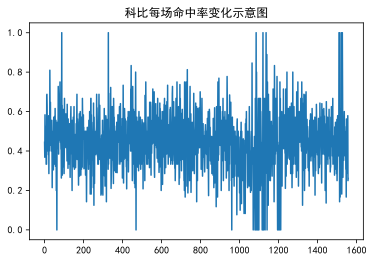

In [11]:
# 可视化命中率变化
plt.plot(range(len(x.values)), x.values)
plt.title('科比每场命中率变化示意图')

- 从该图可以看出，科比每场比赛的命中率总体在0.3-0.6波动。

# 各节/各赛季命中率

In [12]:
# 职业生涯各节命中率
kobe.pivot_table(index='period', values='shot_made_flag', aggfunc='mean')

,shot_made_flag
period,
1,0.465672
2,0.448802
3,0.453442
4,0.413702
5,0.442857
6,0.466667
7,0.428571


Text(0, 0.5, '命中率')

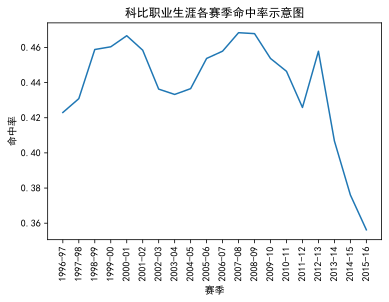

In [13]:
# 职业生涯各赛季命中率
season = kobe.pivot_table(index='season', values='shot_made_flag', aggfunc='mean')
fig, ax = plt.subplots()
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.plot(season.index, season.values)
plt.title('科比职业生涯各赛季命中率示意图')
plt.xlabel('赛季')
plt.ylabel('命中率')

In [14]:
# 职业生涯各赛季各节命中率
p_1 = kobe[kobe['period'] == 1].pivot_table(index='season', values='shot_made_flag', aggfunc='mean')  # 第一节
p_2 = kobe[kobe['period'] == 2].pivot_table(index='season', values='shot_made_flag', aggfunc='mean')  # 第二节
p_3 = kobe[kobe['period'] == 3].pivot_table(index='season', values='shot_made_flag', aggfunc='mean')  # 第三节
p_4 = kobe[kobe['period'] == 4].pivot_table(index='season', values='shot_made_flag', aggfunc='mean')  # 第四节

Text(0, 0.5, '命中率')

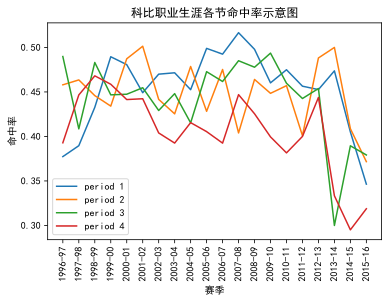

In [15]:
fig, ax = plt.subplots()
# ax[0, 0].plot(p_1.values)
plt.plot(p_1)
plt.plot(p_2)
plt.plot(p_3)
plt.plot(p_4)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.title('科比职业生涯各节命中率示意图')
plt.legend(('period 1', 'period 2', 'period 3', 'period 4'), loc='best')
plt.xlabel('赛季')
plt.ylabel('命中率')

# 2分球和3分球命中率

In [16]:
kobe.pivot_table(index='shot_type', values='shot_made_flag', aggfunc='mean')

,shot_made_flag
shot_type,
2PT Field Goal,0.477348
3PT Field Goal,0.329268


- 2分球命中率为47.7%，3分球命中率为32.9%

# 各个位置的命中率

In [17]:
kobe.pivot_table(index='shot_zone_area', values='shot_made_flag', aggfunc='mean')

,shot_made_flag
shot_zone_area,
Back Court(BC),0.013889
Center(C),0.525556
Left Side Center(LC),0.361177
Left Side(L),0.396871
Right Side Center(RC),0.382567
Right Side(R),0.401658


In [18]:
kobe.pivot_table(index='shot_zone_basic', values='shot_made_flag', aggfunc='mean')

,shot_made_flag
shot_zone_basic,
Above the Break 3,0.329237
Backcourt,0.016667
In The Paint (Non-RA),0.454381
Left Corner 3,0.370833
Mid-Range,0.406286
Restricted Area,0.618004
Right Corner 3,0.339339


In [19]:
kobe.pivot_table(index='shot_zone_range', values='shot_made_flag', aggfunc='mean')

,shot_made_flag
shot_zone_range,
16-24 ft.,0.401766
24+ ft.,0.332513
8-16 ft.,0.435484
Back Court Shot,0.013889
Less Than 8 ft.,0.573120


- 从整体来看，离篮板距离越近命中率越高。

# 主客场命中率

In [20]:
kobe.pivot_table(index='home', values='shot_made_flag', aggfunc='mean')

,shot_made_flag
home,
0,0.436421
1,0.456468


- 主场45.6%，客场43.6%

# 各出手方式命中率（粗分类）

In [21]:
kobe.pivot_table(index='combined_shot_type', values='shot_made_flag', aggfunc='mean')

,shot_made_flag
combined_shot_type,
Bank Shot,0.791667
Dunk,0.928030
Hook Shot,0.535433
Jump Shot,0.391071
Layup,0.565093
Tip Shot,0.348684


- 擦板79.1%
- 扣篮92.8%
- 钩射投篮53.5%
- 跳投39.1%
- 上篮56.5%
- 补篮34.9%

# 出手偏好

In [22]:
# 利用to_frame()将Series对象转为DataFrame对象，并重命名columns
shot_attempt = kobe.groupby(['combined_shot_type', 'action_type']).count().shot_id.to_frame('attempt')
shot_attempt['percentage'] = shot_attempt.attempt / shot_attempt.attempt.sum()
shot_attempt.groupby('combined_shot_type').sum().percentage

combined_shot_type
Bank Shot    0.004670
Dunk         0.041094
Hook Shot    0.004942
Jump Shot    0.767016
Layup        0.176363
Tip Shot     0.005915
Name: percentage, dtype: float64

In [23]:
shot_attempt.percentage.nlargest(5)

combined_shot_type  action_type         
Jump Shot           Jump Shot               0.616259
Layup               Layup Shot              0.083823
                    Driving Layup Shot      0.063354
Jump Shot           Turnaround Jump Shot    0.034673
                    Fadeaway Jump Shot      0.033934
Name: percentage, dtype: float64

- 6类粗动作中，科比最喜欢用跳投的方式，进一步细化后发现科比最常用的5种得分手段为普通跳投、普通上篮、突破上篮、转身跳投与后仰跳投。

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


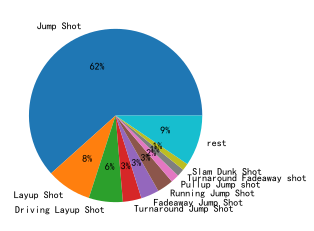

In [24]:
# 可视化科比得分方式的使用概率
tmp = shot_attempt.percentage.nlargest(9).to_frame()
tmp.index = tmp.index.map(lambda x: x[1])
tmp.loc['rest'] = 1 - tmp['percentage'].sum()
plt.pie(tmp, labels=tmp.index, autopct='%.0f%%')
plt.show()

# 各个位置的出手概率

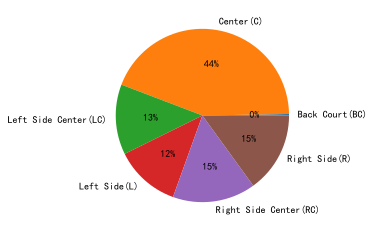

In [25]:
shot_attempt = kobe.groupby(['shot_zone_area', 'shot_zone_basic', 'shot_zone_range'])['shot_id'].count().to_frame('attempt')
shot_attempt['percentage'] = shot_attempt.attempt / shot_attempt.attempt.sum()
tmp_1 = shot_attempt.groupby('shot_zone_area').sum()
plt.pie(tmp_1['percentage'], labels=tmp_1.index, autopct='%.0f%%')
plt.show()

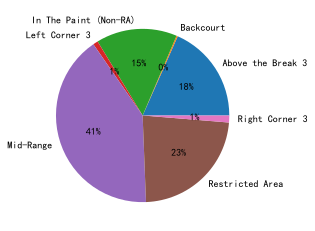

In [26]:
tmp_2 = shot_attempt.groupby('shot_zone_basic').sum()
plt.pie(tmp_2['percentage'], labels=tmp_2.index, autopct='%.0f%%')
plt.show()

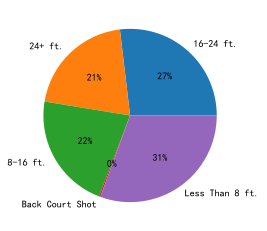

In [27]:
tmp_3 = shot_attempt.groupby('shot_zone_range').sum()
plt.pie(tmp_3['percentage'], labels=tmp_3.index, autopct='%.0f%%')
plt.show()